# 什么是Pytorch？

Pytorch是一个基于Python的科学计算库，它有以下特点：\
（1）类似于Numpy,但它可以使用GPU\
（2）它可以定义深度学习模型，可以灵活地进行深度学习模型的训练和使用

Tensors\
Tensor类似于Numpy的ndarray,唯一的区别是Tensor可以在GPU上加速运算

# 内容一：Pytorch初识

In [1]:
import torch
import torchvision

tensor的构建：
- 构建一个未初始化的5$\times$3矩阵
- 构建一个随机初始化的矩阵
- 构建一个全部为0，类型为long的矩阵
- 从数据直接构建tensor
- 也可以从一个已有的tensor构建一个tensor。这些方法会重用原来tensor的特征，例如数据类型
- 产生跟原来数据相同形状的tensor

In [2]:
x = torch.empty(5,3)
x = torch.rand(5,3)
x = torch.zeros(5,3,dtype=torch.long) # x = torch.zeros(5,3).long()
x = torch.tensor([5.5,3])
y = x.new_ones(5,3)
y = torch.randn_like(x) # x.shape

Tensor的运算：
- 加法运算（note: 任何in-place运算都会以_结尾，例如x.copy_(y)）
- 各类的Numpy的index操作都可以在tensor上使用
- Resize操作，使用.view()
- 如果只有一个元素的tensor，使用.item()方法可以把里面的value变成Python数值

In [3]:
x = torch.rand(4,4)
y = torch.rand(4,4)
# for add
x + y # torch.add(x,y)
y.add_(x) # in-place加法
# for index
x[1:,1:]
# for resize
z = x.view(16)
z = x.view(2,-1)
# pick up the value
single_x = torch.randn(1)
single_x.item()

-0.5127631425857544

Numpy与Tensor之间的转化

In [4]:
import numpy as np

# tensor转numpy
a = torch.ones(5)
b = a.numpy()

# numpy转tensor
a = np.ones(5)
b = torch.from_numpy(a)

# 内容二：利用numpy实现两层神经网络

用该程序帮我们复习BP算法\
一个全连接ReLU神经网络，一个隐含层，没有bias，使用L2 Loss
- $h = W_1X+b_1$
- $a = max(0,h)$
- $y_{hat} = W_2a+b_2$

numpy ndarray是一个普通的n维array，它不知道任何关于深度学习或者梯度（gradient）的知识，也不知道计算图（computation graph），只是一种用来计算数学运算的数据结构

In [5]:
N,D_in,H,D_out = 64, 1000, 100, 10 # N: batch size, D_in:input size, H:hidden size, D_out: output size
# 随机初始化一些训练数据
x = np.random.randn(N,D_in) # random initialize some data
y = np.random.randn(N,D_out) # random initialize the label of the data
w1 = np.random.randn(D_in,H) # 初始化权重
w2 = np.random.randn(H,D_out)
learning_rate = 1e-6
for it in range(500):
    # forward pass，compute the output
    h = x.dot(w1) # N * H
    h_relu = np.maximum(h,0) # N * H
    y_pred = h_relu.dot(w2) # N * D_out
    # compute loss
    loss = np.square(y_pred-y).sum()
    print(it,loss)
    # BP - compute the gradient
    grad_y_pred = 2.0 * (y_pred-y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h<0] = 0
    grad_w1 = x.T.dot(grad_h)    
    # update weights of w1 and w2
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2   

0 31194526.548431788
1 27655117.742151327
2 26549922.246123727
3 24359941.15667388
4 19855243.9696687
5 14116429.148078632
6 8948298.580351364
7 5359354.753244726
8 3212393.243844055
9 2023505.0438694991
10 1367079.8708915054
11 992852.9317581702
12 765253.8798828311
13 615834.1886277562
14 510673.7383904825
15 431973.5539462168
16 370381.51479524287
17 320619.85010726954
18 279522.83228758734
19 245087.90973322763
20 215951.77523981495
21 191062.3399546533
22 169677.3025068581
23 151197.82367054455
24 135129.07971955166
25 121111.99576248933
26 108846.2626378549
27 98100.94990619938
28 88627.69709057707
29 80248.2574580576
30 72810.81315501679
31 66199.52633062171
32 60302.7911938921
33 55031.98616569783
34 50316.51596136205
35 46086.460302593696
36 42277.73087550588
37 38844.12263346932
38 35739.0132357516
39 32925.51330772934
40 30373.46333988735
41 28053.609309046205
42 25945.91303516193
43 24025.86375512403
44 22270.60156780457
45 20665.08733841913
46 19195.413629966602
47 17846.2

437 0.00018213085042348054
438 0.00017442488524992394
439 0.00016704623175260527
440 0.0001599798783257623
441 0.00015321498551007246
442 0.00014673722860803702
443 0.0001405336601142118
444 0.00013459294521303176
445 0.00012890331943605124
446 0.00012345484718499506
447 0.00011823848356061302
448 0.0001132423364312381
449 0.00010845943580766457
450 0.00010387873886864302
451 9.949182199712439e-05
452 9.52905865333878e-05
453 9.126719437842374e-05
454 8.741376047338625e-05
455 8.372359316914337e-05
456 8.019067204490523e-05
457 7.68072095803911e-05
458 7.35665275193721e-05
459 7.046305204959873e-05
460 6.749038619527112e-05
461 6.464392747775775e-05
462 6.191786737530066e-05
463 5.9306951325109066e-05
464 5.680724480653351e-05
465 5.4412484178065134e-05
466 5.211896986383363e-05
467 4.992293072406894e-05
468 4.781909611160408e-05
469 4.580422216606846e-05
470 4.3874778042197144e-05
471 4.2026692332232214e-05
472 4.025717813356552e-05
473 3.8561994072813925e-05
474 3.69381725633285e-05


In [6]:
x = torch.from_numpy(x)
y = x.new_ones(5,3)
y.dtype

torch.float64

# 内容三：利用Tensors实现两层神经网络

利用tensors来创建前向神经网络，计算损失以及反向传播

Tensor: 一个Pytorch Tensor很像一个numpy的ndarray，但是它和numpy ndarray最大的区别是，Pytorch Tensor可以再CPU或者GPU上运算。如果想在GPU上运算，就需要把Tensor换成cuda类型

Autograd: Pytorch的一个重要功能就是autograd，也就是说只要定义了forward pass（前向神经网络），计算了Loss之后，Pytorch可以自动求导计算模型所有参数的梯度。

要想计算某个Tensor x 的梯度需要x.requires_grad = True,那么x.grad存储着x当前梯度

# 子内容一：直接用Tensor替换numpy

In [7]:
N,D_in,H,D_out = 64, 1000, 100, 10 # N: batch size, D_in:input size, H:hidden size, D_out: output size
# 随机初始化一些训练数据
x = torch.randn(N,D_in) # x = np.random.randn(N,D_in)
y = torch.randn(N,D_out) # y = np.random.randn(N,D_out)
w1 = torch.randn(D_in,H) # w1 = np.random.randn(D_in,H)
w2 = torch.randn(H,D_out) # w2 = np.random.randn(H,D_out)
learning_rate = 1e-6
for it in range(500):
    # forward pass
    h = x.mm(w1) # N * H      h = x.dot(w1)
    h_relu = h.clamp(min=0) # N * H     np.maximum(h,0)
    y_pred = h_relu.mm(w2) # N * D_out     h_relu.dot(w2)  
    # compute loss
    loss = (y_pred - y).pow(2).sum() # np.square(y_pred-y).sum()
    print(it,loss.item()) #  print(it,loss)    
    # BP - compute the gradient
    grad_y_pred = 2.0 * (y_pred-y)
    grad_w2 = h_relu.t().mm(grad_y_pred) # h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())  # grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.clone() # grad_h_relu.copy()
    grad_h[h<0] = 0
    grad_w1 = x.t().mm(grad_h) # x.T.dot(grad_h)    
    # update weights of w1 and w2
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 38355576.0
1 41779332.0
2 49420364.0
3 49553492.0
4 36418624.0
5 18285826.0
6 7341599.0
7 3106264.5
8 1708326.75
9 1177907.0
10 911852.1875
11 740334.0
12 613771.875
13 514733.78125
14 434993.125
15 370037.0625
16 316656.25
17 272434.03125
18 235517.390625
19 204515.03125
20 178323.046875
21 156106.25
22 137169.796875
23 120932.8359375
24 106960.0546875
25 94868.0
26 84374.1328125
27 75230.5546875
28 67242.7578125
29 60236.8671875
30 54076.01171875
31 48642.3515625
32 43839.19921875
33 39579.65625
34 35794.93359375
35 32423.27734375
36 29413.00390625
37 26720.078125
38 24304.88671875
39 22135.490234375
40 20184.224609375
41 18429.083984375
42 16847.837890625
43 15419.1650390625
44 14126.2021484375
45 12954.923828125
46 11892.3359375
47 10926.6962890625
48 10048.4609375
49 9248.8935546875
50 8520.0478515625
51 7854.892578125
52 7247.21484375
53 6691.544921875
54 6182.6806640625
55 5716.2568359375
56 5288.5576171875
57 4895.97998046875
58 4535.31591796875
59 4203.7392578125
60 3898.453

443 0.00011261056351941079
444 0.0001102595851989463
445 0.00010856012522708625
446 0.0001071213191607967
447 0.000105232436908409
448 0.00010312729136785492
449 0.00010181227116845548
450 0.00010032863065134734
451 9.81855919235386e-05
452 9.655014582676813e-05
453 9.470029908698052e-05
454 9.310727182310075e-05
455 9.154292638413608e-05
456 9.04051776160486e-05
457 8.886758587323129e-05
458 8.757866453379393e-05
459 8.615193655714393e-05
460 8.482529665343463e-05
461 8.355639147339389e-05
462 8.195551345124841e-05
463 8.077910752035677e-05
464 7.961552910273895e-05
465 7.826922228559852e-05
466 7.718806591583416e-05
467 7.597268268000335e-05
468 7.496548641938716e-05
469 7.405599899357185e-05
470 7.294452370842919e-05
471 7.174287748057395e-05
472 7.05320926499553e-05
473 6.946631765458733e-05
474 6.847093027317896e-05
475 6.73916656523943e-05
476 6.671766459476203e-05
477 6.560136534972116e-05
478 6.476499402197078e-05
479 6.364512955769897e-05
480 6.32128503639251e-05
481 6.2224717

# 子内容二：用Tensor的autograd直接计算梯度

In [8]:
# 简单的autograd
x = torch.tensor(1.,requires_grad=True)
w = torch.tensor(2.,requires_grad=True)
b = torch.tensor(3.,requires_grad=True)
y = w*x + b
y.backward()
print(w.grad)

tensor(1.)


Tensor可以自动帮我们计算BP

In [9]:
#利用Tensor的BP算法直接进行梯度计算

N,D_in,H,D_out = 64, 1000, 100, 10 # N: batch size, D_in:input size, H:hidden size, D_out: output size
# 随机初始化一些训练数据
x = torch.randn(N,D_in)
y = torch.randn(N,D_out)

w1 = torch.randn(D_in,H,requires_grad=True)# torch.randn(D_in,H)
w2 = torch.randn(H,D_out,requires_grad=True)# torch.randn(H,D_out)

learning_rate = 1e-6

for it in range(500):
    # forward pass
    #h = x.mm(w1) # N * H     
    #h_relu = h.clamp(min=0) # N * H     
    #y_pred = h_relu.mm(w2) # N * D_out 
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    # compute loss
    loss = (y_pred - y).pow(2).sum() # computation graph np.square(y_pred-y).sum()
    print(it,loss.item()) #  print(it,loss)
    
    # BP - compute the gradient
    loss.backward()
    # grad_y_pred = 2.0 * (y_pred-y)
    # grad_w2 = h_relu.t().mm(grad_y_pred) 
    # grad_h_relu = grad_y_pred.mm(w2.t())  
    # grad_h = grad_h_relu.clone() 
    # grad_h[h<0] = 0
    # grad_w1 = x.t().mm(grad_h) 
    
    # update weights of w1 and w2
    with torch.no_grad(): # 为了不计算w1和w2的计算图
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

0 31522508.0
1 25455086.0
2 21677772.0
3 17750986.0
4 13489816.0
5 9500500.0
6 6381693.5
7 4224839.0
8 2851618.0
9 1999882.625
10 1469803.5
11 1129250.125
12 900051.8125
13 737904.375
14 617696.6875
15 524867.125
16 450760.375
17 390156.0
18 339789.75
19 297409.09375
20 261416.125
21 230591.6875
22 204034.65625
23 181042.0625
24 161050.03125
25 143639.140625
26 128394.96875
27 114996.2734375
28 103206.59375
29 92798.5390625
30 83580.6328125
31 75390.296875
32 68104.7734375
33 61609.27734375
34 55808.28515625
35 50616.640625
36 45966.36328125
37 41796.65234375
38 38048.55078125
39 34674.76953125
40 31633.572265625
41 28887.09375
42 26405.22265625
43 24160.42578125
44 22126.794921875
45 20283.1796875
46 18610.064453125
47 17089.244140625
48 15703.775390625
49 14441.7880859375
50 13291.751953125
51 12242.0830078125
52 11283.3388671875
53 10406.935546875
54 9605.34375
55 8871.4736328125
56 8199.2021484375
57 7582.87646484375
58 7017.05859375
59 6497.65185546875
60 6020.33056640625
61 5581.

382 0.0023086187429726124
383 0.0022330281790345907
384 0.002157854847609997
385 0.0020871912129223347
386 0.0020196919795125723
387 0.0019550577271729708
388 0.0018894495442509651
389 0.0018267962150275707
390 0.0017693720292299986
391 0.0017134321387857199
392 0.001660226145759225
393 0.0016087417025119066
394 0.0015574742574244738
395 0.0015108840307220817
396 0.0014638251159340143
397 0.001417298219166696
398 0.0013747784541919827
399 0.0013304103631526232
400 0.0012900205329060555
401 0.001251229434274137
402 0.0012145101791247725
403 0.0011781287612393498
404 0.001141733373515308
405 0.001108878175728023
406 0.001075855689123273
407 0.0010442856000736356
408 0.0010143599938601255
409 0.0009853511583060026
410 0.0009567664237692952
411 0.0009291147580370307
412 0.0009023147285915911
413 0.0008765419479459524
414 0.0008525992161594331
415 0.0008275311556644738
416 0.0008042900008149445
417 0.0007828122470527887
418 0.0007614129572175443
419 0.0007412307895720005
420 0.0007207777816

In [10]:
# 下列代码用于说明必须要把梯度清零
x = torch.randn(N,D_in)
y = torch.randn(N,D_out)
w1 = torch.randn(D_in,H,requires_grad=True)# torch.randn(D_in,H)
w2 = torch.randn(H,D_out,requires_grad=True)# torch.randn(H,D_out)

In [11]:
# 下列代码用于说明必须要把梯度清零
y_pred = x.mm(w1).clamp(min=0).mm(w2)
loss = (y_pred - y).pow(2).sum()
#w1.grad.zero_()
#w2.grad.zero_()
loss.backward()
w1.grad

tensor([[ -3909.4990,   4398.3315,  -4597.5283,  ...,   -782.3271,
          -3993.0652,   -850.4023],
        [ -1627.6656,    553.6783,  -2042.0912,  ...,   3187.9929,
           1170.5953,  -1748.8193],
        [ -3913.9443,   1899.1002,  -3751.2349,  ...,   6293.1289,
          -1041.1543,    -75.7998],
        ...,
        [  9931.0508,  -3941.4084,  -6253.4600,  ...,  -2804.8171,
         -11422.1055,    818.7299],
        [  -290.0145,   1777.6909,  -9200.8750,  ...,    655.6790,
           1096.3789,   4048.1763],
        [  2485.5066,  -3246.7190,  -3334.1716,  ...,   -500.0161,
          -5594.0996,  -1212.4600]])

# 子内容三：利用Pytorch的nn库来构建网络

In [12]:
import torch.nn as nn

N,D_in,H,D_out = 64, 1000, 100, 10 # N: batch size, D_in:input size, H:hidden size, D_out: output size
# 随机初始化一些训练数据
x = torch.randn(N,D_in)
y = torch.randn(N,D_out)
model = nn.Sequential(
    nn.Linear(D_in,H), # with bias
    nn.ReLU(),
    nn.Linear(H,D_out) 
)
loss_fn = nn.MSELoss(reduction='sum')
learning_rate = 1e-6
for it in range(500):
    # forward pass
    y_pred = model(x) # y_pred = x.mm(w1).clamp(min=0).mm(w2)
    # compute loss
    loss = loss_fn(y_pred,y) # (y_pred - y).pow(2).sum()
    print(it,loss.item()) 
    # BP - compute the gradient
    loss.backward()    
    # update weights of w1 and w2
    with torch.no_grad(): # 为了不计算w1和w2的计算图
        for param in model.parameters():
            param -= learning_rate * param.grad
    model.zero_grad()

0 642.0325317382812
1 641.5671997070312
2 641.1023559570312
3 640.6381225585938
4 640.1746215820312
5 639.711669921875
6 639.249755859375
7 638.7885131835938
8 638.3280639648438
9 637.8687133789062
10 637.4097900390625
11 636.951416015625
12 636.493896484375
13 636.037109375
14 635.5813598632812
15 635.1260986328125
16 634.6714477539062
17 634.2174072265625
18 633.763916015625
19 633.3111572265625
20 632.85888671875
21 632.4070434570312
22 631.9556274414062
23 631.504638671875
24 631.0541381835938
25 630.6040649414062
26 630.1544189453125
27 629.7053833007812
28 629.2568359375
29 628.8092651367188
30 628.363037109375
31 627.9171752929688
32 627.4719848632812
33 627.0272216796875
34 626.5834350585938
35 626.1409301757812
36 625.69921875
37 625.2578125
38 624.81689453125
39 624.37646484375
40 623.9363403320312
41 623.496826171875
42 623.0576171875
43 622.618896484375
44 622.1806640625
45 621.7430419921875
46 621.305908203125
47 620.8692016601562
48 620.4329833984375
49 619.9970703125
50 

431 484.1826477050781
432 483.890380859375
433 483.59832763671875
434 483.3067626953125
435 483.015625
436 482.7247619628906
437 482.43377685546875
438 482.1429748535156
439 481.8524475097656
440 481.56207275390625
441 481.2721862792969
442 480.9825439453125
443 480.693115234375
444 480.4038391113281
445 480.11480712890625
446 479.8260192871094
447 479.53729248046875
448 479.2486572265625
449 478.9602966308594
450 478.6721496582031
451 478.38409423828125
452 478.09637451171875
453 477.80908203125
454 477.5218811035156
455 477.2347717285156
456 476.94805908203125
457 476.6617126464844
458 476.3752746582031
459 476.0890808105469
460 475.80322265625
461 475.5177307128906
462 475.23260498046875
463 474.94793701171875
464 474.6634216308594
465 474.3789978027344
466 474.09503173828125
467 473.811279296875
468 473.52777099609375
469 473.2442626953125
470 472.9610595703125
471 472.6780090332031
472 472.3951416015625
473 472.11248779296875
474 471.8300476074219
475 471.54766845703125
476 471.26

# 子内容四：利用Pytorch的optim来更新参数

不用手动更新模型的weights，使用optim来帮助我们更新参数。optim这个package提供了各种不同的模型优化算法，包括SGD，Momentum，Adam等

In [13]:

import torch.nn as nn

N,D_in,H,D_out = 64, 1000, 100, 10 # N: batch size, D_in:input size, H:hidden size, D_out: output size
# 随机初始化一些训练数据
x = torch.randn(N,D_in)
y = torch.randn(N,D_out)
model = nn.Sequential(
    nn.Linear(D_in,H), # with bias
    nn.ReLU(),
    nn.Linear(H,D_out) 
)
loss_fn = nn.MSELoss(reduction='sum')
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
for it in range(500):
    # forward pass
    y_pred = model(x) 
    # compute loss
    loss = loss_fn(y_pred,y)
    print(it,loss.item())     
    # BP - compute the gradient
    loss.backward()     
    # update weights of parameters    
    optimizer.step()    
    optimizer.zero_grad()
    #with torch.no_grad(): # 为了不计算w1和w2的计算图
    #    for param in model.parameters():
    #        param -= learning_rate * param.grad
    #model.zero_grad()

0 674.6793823242188
1 658.19677734375
2 642.1536254882812
3 626.550537109375
4 611.3473510742188
5 596.5071411132812
6 582.0377807617188
7 568.0018920898438
8 554.360595703125
9 541.1260986328125
10 528.197998046875
11 515.612060546875
12 503.4132995605469
13 491.56744384765625
14 480.047607421875
15 468.7904968261719
16 457.7877197265625
17 447.09954833984375
18 436.6494140625
19 426.4705810546875
20 416.5847473144531
21 406.9100646972656
22 397.4678955078125
23 388.2847900390625
24 379.3332214355469
25 370.5895080566406
26 362.0893249511719
27 353.8084716796875
28 345.69635009765625
29 337.7305603027344
30 329.94781494140625
31 322.33721923828125
32 314.8773193359375
33 307.580322265625
34 300.432861328125
35 293.4280700683594
36 286.58294677734375
37 279.8750915527344
38 273.30047607421875
39 266.8538513183594
40 260.5411682128906
41 254.3470458984375
42 248.26475524902344
43 242.29835510253906
44 236.44845581054688
45 230.71942138671875
46 225.1246795654297
47 219.6442108154297
48 

375 5.313831479725195e-06
376 4.9361765377398115e-06
377 4.583699592330959e-06
378 4.257047748978948e-06
379 3.951566213800106e-06
380 3.6680255561805097e-06
381 3.40305609825009e-06
382 3.1568051781505346e-06
383 2.929089077952085e-06
384 2.7158187094755704e-06
385 2.5185834147123387e-06
386 2.3353202323050937e-06
387 2.1644032131007407e-06
388 2.0057152596564265e-06
389 1.8579596599010983e-06
390 1.721242256280675e-06
391 1.594980972186022e-06
392 1.4762022146896925e-06
393 1.3670678526978008e-06
394 1.2653516705540824e-06
395 1.1711430261129863e-06
396 1.0835684634002973e-06
397 1.002374233394221e-06
398 9.269026008951187e-07
399 8.570931981921603e-07
400 7.923458156255947e-07
401 7.323477575482684e-07
402 6.768771640963678e-07
403 6.252462867450959e-07
404 5.770359052803542e-07
405 5.336523827281781e-07
406 4.924830250274681e-07
407 4.544556588825799e-07
408 4.194577627458784e-07
409 3.8690947690156463e-07
410 3.567970736639836e-07
411 3.2931629334598256e-07
412 3.035653719507536e-

# 子内容五：利用类来完成网络构建

In [14]:
import torch.nn as nn

N,D_in,H,D_out = 64, 1000, 100, 10 # N: batch size, D_in:input size, H:hidden size, D_out: output size
x = torch.randn(N,D_in)
y = torch.randn(N,D_out)

class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(TwoLayerNet,self).__init__()
        self.linear1 = nn.Linear(D_in,H)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(H,D_out)
    def forward(self,x):
        y_pred = self.linear2(self.relu(self.linear1(x)))
        return y_pred
model = TwoLayerNet(D_in,H,D_out)
#model = model.cuda()
#device
#model = nn.Sequential(
#    nn.Linear(D_in,H), # with bias
#    nn.ReLU(),
#    nn.Linear(H,D_out) 
#)
loss_fn = nn.MSELoss(reduction='sum')
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
for it in range(500):
    # forward pass
    y_pred = model(x) 
    # compute loss
    loss = loss_fn(y_pred,y)
    print(it,loss.item())     
    optimizer.zero_grad()
    # BP - compute the gradient
    loss.backward()     
    # update weights of parameters    
    optimizer.step()

0 721.94189453125
1 704.2423095703125
2 687.082275390625
3 670.422607421875
4 654.2238159179688
5 638.44140625
6 623.0505981445312
7 608.0311889648438
8 593.422119140625
9 579.280517578125
10 565.4913330078125
11 552.1077270507812
12 539.1589965820312
13 526.59130859375
14 514.3456420898438
15 502.44219970703125
16 490.8777770996094
17 479.6214294433594
18 468.74212646484375
19 458.1886291503906
20 447.9332580566406
21 437.9912109375
22 428.27838134765625
23 418.7584533691406
24 409.4549255371094
25 400.3836669921875
26 391.5910339355469
27 383.0187072753906
28 374.622802734375
29 366.4154968261719
30 358.3964538574219
31 350.57525634765625
32 342.9398498535156
33 335.4408264160156
34 328.1024169921875
35 320.8974609375
36 313.84332275390625
37 306.9267578125
38 300.1396789550781
39 293.50018310546875
40 286.99896240234375
41 280.6287841796875
42 274.39373779296875
43 268.2579040527344
44 262.22119140625
45 256.3048095703125
46 250.48587036132812
47 244.80801391601562
48 239.2502136230

393 0.0001021480347844772
394 9.709320875117555e-05
395 9.228695125784725e-05
396 8.76974081620574e-05
397 8.333598088938743e-05
398 7.91816200944595e-05
399 7.522698433604091e-05
400 7.145944982767105e-05
401 6.787759048165753e-05
402 6.446607585530728e-05
403 6.122172635514289e-05
404 5.813697862322442e-05
405 5.520036575035192e-05
406 5.2404222515178844e-05
407 4.974683906766586e-05
408 4.721799268736504e-05
409 4.481481300899759e-05
410 4.2528321500867605e-05
411 4.035417077830061e-05
412 3.828768240055069e-05
413 3.6321875086287037e-05
414 3.4455159038770944e-05
415 3.268260843469761e-05
416 3.099428067798726e-05
417 2.9391127100097947e-05
418 2.786900040518958e-05
419 2.6421534130349755e-05
420 2.504840085748583e-05
421 2.3743406927678734e-05
422 2.250288162031211e-05
423 2.132729241566267e-05
424 2.0209463400533423e-05
425 1.9147899365634657e-05
426 1.8140930478693917e-05
427 1.7184185708174482e-05
428 1.6275636880891398e-05
429 1.5415320376632735e-05
430 1.4598484995076433e-05


In [15]:
import torch
import torch.nn as nn
N,D_in,H,D_out = 64, 1000, 100, 10 
x = torch.randn(N,D_in)
y = torch.randn(N,D_out)
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(TwoLayerNet,self).__init__()
        self.linear1 = nn.Linear(D_in,H)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(H,D_out)
    def forward(self,x):
        y_pred = self.linear2(self.relu(self.linear1(x)))
        return y_pred
model = TwoLayerNet(D_in,H,D_out)
loss_fn = nn.MSELoss(reduction='sum')
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
for it in range(500):
    y_pred = model(x) 
    loss = loss_fn(y_pred,y)
    print(it,loss.item())     
    optimizer.zero_grad()
    loss.backward()     
    optimizer.step()

0 743.1673583984375
1 725.3632202148438
2 708.0699462890625
3 691.2518310546875
4 674.915283203125
5 659.0536499023438
6 643.6704711914062
7 628.688232421875
8 614.1387939453125
9 599.9671020507812
10 586.2158203125
11 572.87060546875
12 560.0309448242188
13 547.6349487304688
14 535.6087646484375
15 523.8889770507812
16 512.43798828125
17 501.2744140625
18 490.3535461425781
19 479.7871398925781
20 469.51837158203125
21 459.487548828125
22 449.71282958984375
23 440.16461181640625
24 430.8415222167969
25 421.7671203613281
26 412.8985290527344
27 404.23260498046875
28 395.7430114746094
29 387.41558837890625
30 379.26800537109375
31 371.3331298828125
32 363.5932312011719
33 356.0309143066406
34 348.6346435546875
35 341.412841796875
36 334.3460998535156
37 327.4201965332031
38 320.6623229980469
39 314.0277404785156
40 307.5069885253906
41 301.1229248046875
42 294.8794860839844
43 288.7699890136719
44 282.7855224609375
45 276.8906555175781
46 271.07989501953125
47 265.36224365234375
48 259.7

367 0.0005300516495481133
368 0.0005044490681029856
369 0.00048009405145421624
370 0.00045689663966186345
371 0.0004348154761828482
372 0.0004138029180467129
373 0.0003937928704544902
374 0.00037475358112715185
375 0.000356637523509562
376 0.000339381251251325
377 0.00032298770383931696
378 0.00030733403400518
379 0.00029247469501569867
380 0.0002783203963190317
381 0.0002648566151037812
382 0.0002520255802664906
383 0.00023982615675777197
384 0.00022821369930170476
385 0.00021716953779105097
386 0.0002066475135507062
387 0.0001966329145943746
388 0.00018710788572207093
389 0.00017803905939217657
390 0.00016941521607805043
391 0.00016120896907523274
392 0.0001533916947664693
393 0.00014595629181712866
394 0.00013888016110286117
395 0.00013214006321504712
396 0.00012573279673233628
397 0.00011963357974309474
398 0.00011383362289052457
399 0.00010830843530129641
400 0.00010304886382073164
401 9.804824367165565e-05
402 9.328960004495457e-05
403 8.875881030689925e-05
404 8.444493141723797e

# 扩展实验

## torch.nn mnist数据集
搭建一个简单的卷积神经网络在mnist数据集上训练

In [16]:
import torch
import torchvision
import torchvision.transforms as transforms # 可帮助对数据进行转换
import torch.nn as nn
train_set = torchvision.datasets.MNIST(
    root = './mnist_data/',   # 数据集在本地的存储位置
    train = True,                   # 数据集用于训练
    download = True,                # 如果本地没有数据，就自动下载
    transform = transforms.Compose([
        transforms.ToTensor()         
    ])                              # 将图像转换成张量
)

train_loader = torch.utils.data.DataLoader(train_set, batch_size = 10)
# 训练集被打包或加载到数据加载器中，可以以我们期望的格式来访问基础数据；
# 数据加载器使我们能够访问数据并提供查询功能

In [17]:
import numpy as np
import matplotlib.pyplot as plt
# 查看数据数量
torch.set_printoptions(linewidth=120)     # 设置打印行宽
print(len(train_set))
print(train_set.train_labels)
print(train_set.targets)
print(train_set.train_labels.bincount())    # bincount:张量中每个值出现的频数

60000
tensor([5, 0, 4,  ..., 5, 6, 8])
tensor([5, 0, 4,  ..., 5, 6, 8])
tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])


/home/scrutiny/.local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


* 要想从训练集对象中访问一个单独的元素，首先要将一个训练集对象(train_set)传递给python的iter()函数，以此返回一个表示数据流的对象；然后就可以使用next函数来获取数据流中的元素

In [18]:
# 查看单个样本
sample = next(iter(train_set))
print(len(sample)) # 28*28的矩阵，标签
print(type(sample)) 

2
<class 'tuple'>


In [19]:
# 将sample解压成图像和标签
image, label = sample
# image = sample[0]
# label = sample[1]
image.shape
# label.shape

torch.Size([1, 28, 28])

label: 5


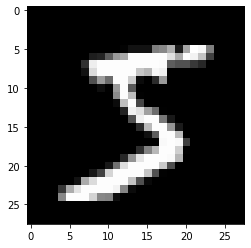

In [20]:
# 显示图像和标签
plt.imshow(image.squeeze(), cmap='gray')    # 将[1, 28, 28]->[28,28]
print('label:', label)

In [21]:
# 查看批量样本
batch= next(iter(train_loader))
print(len(batch))
print(type(batch))
images, labels = batch
print(images.shape)
print(labels.shape)

2
<class 'list'>
torch.Size([10, 1, 28, 28])
torch.Size([10])


torch.Size([3, 32, 302])
labels: tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])


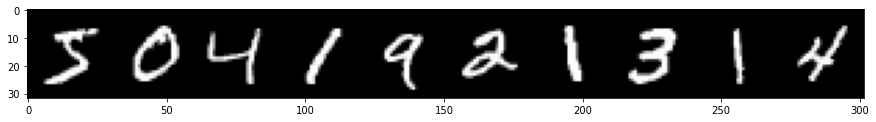

In [22]:
# 画出一批的图像
grid= torchvision.utils.make_grid(images,nrow =10)
print(grid.shape)
plt.figure(figsize=(15, 15))
plt.imshow(np.transpose(grid,(1,2,0)))   # 将张量转换成矩阵
print('labels:', labels)
# 可以通过改变batchsize来显示更多的数据

* 开始建立网络

In [23]:
# 创建网络
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        self.fc1 = nn.Linear(in_features= 12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features= 120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
    
    def forward(self, t):
        t = t
        t = F.relu(self.conv1(t))
        t = F.max_pool2d(t, kernel_size =2, stride=2)
        t = F.relu(self.conv2(t))
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        t = t.reshape(-1, 12*4*4)
        t = F.relu(self.fc1(t))
        t = F.relu(self.fc2(t))
        t = self.out(t)
        return t
        

In [24]:
# 打印网络结构
network = Network()
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

获取准确率函数

In [25]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [26]:
# 创建网络实例
import torch.nn.functional as F
import torch.optim as optim
network = Network()
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)
for epoch in range(2):
    total_loss = 0
    total_correct = 0
    for batch in train_loader:   # Get batch
        
        images, labels =batch
        preds = network(images)
        loss = F.cross_entropy(preds, labels)
        # 
        loss.requires_grad_(True)
        optimizer.zero_grad()  #告诉优化器把梯度属性中权重的梯度归零，否则pytorch会累积梯度
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)
    print("epoch:",epoch,"loss:",total_loss,"total_correct:",total_correct)

epoch: 0 loss: 128.69526237330865 total_correct: 55982
epoch: 1 loss: 49.30825492936128 total_correct: 58547


In [27]:
accuracy = total_correct/len(train_set)
print("accuracy:",accuracy)

accuracy: 0.9757833333333333
